In [1]:
import twint
import nest_asyncio
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

nest_asyncio.apply()

### Before

In [ ]:
c = twint.Config()
c.Username = 'infoJakarta'
c.Since = "2020-08-01" #batas awal tanggal pengambilan tweet
c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
for key in ['vaksin', 'covid']:
    c.Search = key
    c.Output = './infojakarta/before.json' # save to json
    twint.run.Search(c)

### After

In [ ]:
c = twint.Config()
c.Username = 'infoJakarta'
c.Since = "2021-02-01" #batas awal tanggal pengambilan tweet
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
for key in ['vaksin', 'covid']:
    c.Search = key
    c.Output = './infojakarta/after.json' # save to json
    twint.run.Search(c)

In [ ]:
df_before = pd.read_json('./infojakarta/before.json' , lines = True)
df_after = pd.read_json('./infojakarta/after.json' , lines = True)

In [ ]:
# df_before.duplicated()
df_before = df_before[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

df_before = df_before.drop_duplicates(subset='link')
for i in df_before['link']:
    print(i)

In [2]:
from getpass import getpass
from time import sleep
from selenium.webdriver.common.keys import Keys
# from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import numpy as np
from datetime import datetime, timedelta

In [ ]:
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)
# chrome_options.add_argument('headless') # untuk menutup browser

#specify the path to chromedriver.exe
driver = webdriver.Chrome('./chromedriver',chrome_options=chrome_options)

In [ ]:
driver.get('https://www.twitter.com/login')
sleep(2)

username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('dyingrabbit_') # Ubah username sesuai akun pribadi

my_password = getpass()

password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys(my_password)
password.send_keys(Keys.RETURN)

In [ ]:
data_tweets_before = df_before

In [ ]:
def get_list_replies(link):
    list_replies = []
    driver.get(link)
    sleep(2)
    
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(2)
    
    try:
        replies_container = driver.find_element_by_xpath('//div[@aria-label="Timeline: Conversation"]')
        if replies_container:
            replies = replies_container.find_elements_by_xpath('.//div[@dir="ltr"]/span')
            for reply in replies:
                list_replies.append(reply.text)
    except:
        print(list_replies)
        return list_replies
    print(list_replies)
    return list_replies

In [ ]:
arr_temp = []
for i, row in data_tweets_before.iterrows():
     arr_temp.append(get_list_replies(row['link']))

data_tweets_before['list_replies'] = arr_temp
data_tweets_before['list_replies']

In [ ]:
data_tweets_before.to_json('./infojakarta/before_replies.json')

In [ ]:
data_tweets_before = pd.read_json('./infojakarta/before_replies.json')
data_tweets_before

In [ ]:
arr = []
for i in data_tweets_before['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
arr.remove('@infojakarta')
arr

In [ ]:
filename = './infojakarta/before_user_data.json'
for uname in arr:
    uname = uname[1:]
    c = twint.Config()
    c.Username = uname
    c.Since = "2020-08-01" #batas awal tanggal pengambilan tweet
    c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
    c.Search = "covid OR vaksin"
    c.Count = True         
    c.Retweets = True
    c.Stats = True 
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_json = True
    c.Output = filename # save to json
    twint.run.Search(c)

In [ ]:
before_user_data_tweets = pd.read_json('./infojakarta/before_user_data.json', lines = True)
before_user_data_tweets = before_user_data_tweets[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

before_user_data_tweets = before_user_data_tweets.drop_duplicates(subset='link')
for i in before_user_data_tweets['link']:
    print(i)

In [ ]:
arr_temp = []
for i, row in before_user_data_tweets.iterrows():
     arr_temp.append(get_list_replies(row['link']))

before_user_data_tweets['list_replies'] = arr_temp
before_user_data_tweets['list_replies']

In [ ]:
before_user_data_tweets.to_json('./infojakarta/before_user_scrap.json')

### SCRAPPING AFTER DATA

In [ ]:
df_after = pd.read_json('./infojakarta/after.json' , lines = True)
df_after = df_after[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

df_after = df_after.drop_duplicates(subset='link')
for i in df_after['link']:
    print(i)

In [ ]:
data_tweets_after = df_after

In [ ]:
arr_temp = []
for i, row in data_tweets_after.iterrows():
     arr_temp.append(get_list_replies(row['link']))

data_tweets_after['list_replies'] = arr_temp
data_tweets_after['list_replies']

In [ ]:
data_tweets_after.to_json('./infojakarta/after_replies.json')

In [ ]:
data_tweets_after = pd.read_json('./infojakarta/after_replies.json')
data_tweets_after

In [ ]:
arr = []
for i in data_tweets_after['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
arr.remove('@infojakarta')
arr.remove('@DKIJakarta')
arr.remove('@detikcom')
arr.remove('@sandiuno')
arr.remove('@kompascom')
arr.remove('@RadioElshinta')
print(len(arr))
arr

In [ ]:
filename = './infojakarta/after_user_data.json'
for uname in arr:
    uname = uname[1:]
    c = twint.Config()
    c.Username = uname
    c.Since = "2021-02-01" #batas awal tanggal pengambilan tweet
#     c.Until = "2021-01-31" #batas akhir tanggal pengambilan tweet
    c.Search = "covid OR vaksin"
    c.Count = True         
    c.Retweets = True
    c.Stats = True 
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_json = True
    c.Output = filename # save to json
    twint.run.Search(c)

In [ ]:
after_user_data_tweets = pd.read_json('./infojakarta/after_user_data.json', lines = True)
after_user_data_tweets = after_user_data_tweets[['id', 'conversation_id', 'user_id', 'username', 'name','tweet','replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url','user_rt_id', 'user_rt', 'retweet_id', 'reply_to']]

after_user_data_tweets = after_user_data_tweets.drop_duplicates(subset='link')
for i in after_user_data_tweets['link']:
    print(i)

In [ ]:
arr_temp = []
for i, row in after_user_data_tweets.iterrows():
     arr_temp.append(get_list_replies(row['link']))

after_user_data_tweets['list_replies'] = arr_temp
after_user_data_tweets['list_replies']

In [ ]:
after_user_data_tweets.to_json('./infojakarta/after_user_scrap.json')

In [80]:
after_user_data_tweets = pd.read_json('./infojakarta/after_user_scrap.json')
after_user_data_tweets.columns

Index(['id', 'conversation_id', 'user_id', 'username', 'name', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'list_replies'],
      dtype='object')

In [81]:
arr = []
for i in after_user_data_tweets['list_replies']:
    for x in i:
        arr.append(x)
arr = list(set(arr))

prefix = '@'
arr = [i for i in arr if prefix in i]
arr = list(set(arr))
print(len(arr))
arr

99


['@daffa_samalam',
 '@bharatahb',
 '@tirta_hudhi',
 '@rita_triasari',
 '@makLambeTurah',
 '@thisfrieska',
 '@znovietha22',
 '@celloagusta',
 '@nyookkkk',
 '@Riyan_bray',
 '@PecintaSrundeng',
 '@missflorenceli',
 '@detikHealth',
 '@memekriot',
 '@eko_kuntadhi',
 '@fantasidedi',
 '@HasratMuliadi',
 '@KAI121',
 '@Leuncaaaa',
 '@kostumkomik',
 '@P3nj3l4j4h_id',
 '@nofrizalwardoyo',
 '@kompascom',
 '@potatoeggroll',
 '@medcom_id',
 '@carbopIatin',
 '@Wotanet',
 '@detikcom',
 '@BTS_twt__RM',
 '@infojakarta',
 '@richard_sasamu',
 '@dinkesJKT',
 '@Eka4Liong',
 '@Dhe_Besar',
 '@Dyahwh',
 '@chiko_jubilee',
 '@veghievenus',
 '@RemajaKolonial',
 '@siswandibambang',
 '@DKIJakarta',
 '@sicupuh',
 '@anaslyamardhia',
 '@eriesatrya',
 '@InfosuporterID',
 '@thedufresne',
 '@melwth_',
 '@KompasTV',
 '@pringgaft',
 '@JukiHoki',
 '@glowtweets',
 '@iic_a',
 '@afiiitz10',
 '@DessyKezia',
 '@BTS_twt_KTHV',
 '@SugiyantiNinik',
 '@rhmtk_',
 '@fiiambitchious',
 '@CNNIndonesia',
 '@faisalwilmar666',
 '@dont_sal',

### VISUALIZING CLOSENES DEGREE

In [28]:
df_before = pd.read_json('./infojakarta/before_replies.json')
df_before.columns

Index(['id', 'conversation_id', 'user_id', 'username', 'name', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'list_replies'],
      dtype='object')

In [29]:
before_scrap = pd.read_json('./infojakarta/before_user_scrap.json')
before_scrap.columns

Index(['id', 'conversation_id', 'user_id', 'username', 'name', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'list_replies'],
      dtype='object')

In [30]:
before = pd.concat([df_before, before_scrap])
before = before.drop_duplicates(subset='link')
before

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1347527216444280834,1347527216444280832,106038219,infojakarta,@InfoJakarta,Vaksin Sinovac.. Halal. https://t.co/RSc3G6lRXr,3,6,17,[],[],https://twitter.com/infojakarta/status/1347527...,False,,,,,[],"[@infojakarta, @PutraWilson]"
1,1339812480646713346,1339812480646713344,106038219,infojakarta,@InfoJakarta,"Program vaksin gratis, estimasi anggaran yang ...",0,0,1,[],[],https://twitter.com/infojakarta/status/1339812...,False,,,,,[],[@infojakarta]
2,1338462339717206017,1338462339717206016,106038219,infojakarta,@InfoJakarta,Harga vaksin Covid-19. https://t.co/taKxMdi15q,81,323,613,[],[],https://twitter.com/infojakarta/status/1338462...,False,,,,,[],"[@1nstantkarm4, @adhepedrosa, @ImmanuelOwen, @..."
3,1335764645575999491,1335764645575999488,106038219,infojakarta,@InfoJakarta,"Breaking News. 1,2 Juta Vaksin Covid 19 sudah...",9,8,23,[],[],https://twitter.com/infojakarta/status/1335764...,False,,,,,[],"[@infojakarta, @infojakarta, @Rizky_Gendon, @y..."
4,1315506327037255686,1315506327037255680,106038219,infojakarta,@InfoJakarta,Bye Covid ! Pemerintah memastikan program vak...,30,33,58,[],[],https://twitter.com/infojakarta/status/1315506...,False,,,,,[],"[@infojakarta, @Maxgirl13, @Agus1892, @WibowoL..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,1339441103590715392,1339438102436171776,716467385406869505,meuthiaariefia1,Meuthia Ariefiani,@fahrifary tergantung zona mungkin sekarang kr...,1,0,0,[],[],https://twitter.com/meuthiaariefia1/status/133...,False,,,,,"[{'screen_name': 'fahrifary', 'name': 'F A H M...","[@fahrifary, @fahrifary, @meuthiaariefia1, @fa..."
7506,1346381274831671299,1346345645150359552,2429548297,yusamhr,Yusa,@jembutatasmulut Yang penting ga kena covid,1,0,0,[],[],https://twitter.com/yusamhr/status/13463812748...,False,,,,,"[{'screen_name': 'jembutatasmulut', 'name': '⚫...","[@jembutatasmulut, @yusamhr, @benhardimmanuel,..."
7507,1321480969409363969,1321437709592784896,2429548297,yusamhr,Yusa,@indosupporter Kasian CR ga bisa main lawan ba...,0,0,0,[],[],https://twitter.com/yusamhr/status/13214809694...,False,,,,,"[{'screen_name': 'indosupporter', 'name': 'IG:...","[@indosupporter, @yusamhr]"
7508,1312739322995437574,1312708706950242304,2429548297,yusamhr,Yusa,@benhardimmanuel Pemain napoli ada yg covid ye...,1,0,0,[],[],https://twitter.com/yusamhr/status/13127393229...,False,,,,,"[{'screen_name': 'benhardimmanuel', 'name': 'B...","[@benhardimmanuel, @yusamhr, @benhardimmanuel,..."


In [35]:
for i,row in before.iterrows():
    if len(row['list_replies'])<3:
        before = before.drop(i)
    else:
        continue
        
before

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
4,1315506327037255686,1315506327037255680,106038219,infojakarta,@InfoJakarta,Bye Covid ! Pemerintah memastikan program vak...,30,33,58,[],[],https://twitter.com/infojakarta/status/1315506...,False,,,,,[],"[@infojakarta, @Maxgirl13, @Agus1892, @WibowoL..."
9,1343594476862771200,1343594476862771200,106038219,infojakarta,@InfoJakarta,"Muncul Varian Baru Covid 19, RI Tutup Akses Ma...",7,3,18,[],[],https://twitter.com/infojakarta/status/1343594...,False,,,,,[],"[@infojakarta, @eckaNh57, @vieniviedivieci, @k..."
14,1314716813431717890,1314716813431717888,106038219,infojakarta,@InfoJakarta,Empat minggu terakhir rumah makan meradang kri...,4,12,15,[celotehjakarta],[],https://twitter.com/infojakarta/status/1314716...,False,https://twitter.com/KontanNews/status/13145713...,,,,[],"[@infojakarta, @KontanNews, Oct 9, 2020, @Aisa..."
16,1311665776277942273,1311665776277942272,106038219,infojakarta,@InfoJakarta,- Antivirus Covifor (remdesivir) untuk pasien ...,19,14,19,[],[],https://twitter.com/infojakarta/status/1311665...,False,,,,,[],"[@infojakarta, @Riyo109, @Septiaraenii, @Rachm..."
4,1342363228035194880,1342351484252405760,74056367,arie_16,.....,@arvinsio_ @arifiantoyusma @panditfootball Uda...,1,1,0,[],[],https://twitter.com/Arie_16/status/13423632280...,False,,,,,"[{'screen_name': 'arvinsio_', 'name': 'Apin', ...","[@panditfootball, @arifiantoyusma, @Arie_16, @..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,1340131653381865473,1340131653381865472,716467385406869505,meuthiaariefia1,Meuthia Ariefiani,"udah kewalahan di wisma atlit tuh, semoga vaks...",0,0,0,[],[],https://twitter.com/meuthiaariefia1/status/134...,False,https://twitter.com/OmDennis/status/1340110611...,,,,[],"[@meuthiaariefia1, @OmDennis, Dec 19, 2020]"
7504,1339447612559134721,1339446383078588416,716467385406869505,meuthiaariefia1,Meuthia Ariefiani,"@aniipuspita kk ipar positif covid, sekeluarga...",1,0,0,[],[],https://twitter.com/meuthiaariefia1/status/133...,False,,,,,"[{'screen_name': 'aniipuspita', 'name': 'Anii ...","[@meuthiaariefia1, @aniipuspita, @meuthiaarief..."
7505,1339441103590715392,1339438102436171776,716467385406869505,meuthiaariefia1,Meuthia Ariefiani,@fahrifary tergantung zona mungkin sekarang kr...,1,0,0,[],[],https://twitter.com/meuthiaariefia1/status/133...,False,,,,,"[{'screen_name': 'fahrifary', 'name': 'F A H M...","[@fahrifary, @fahrifary, @meuthiaariefia1, @fa..."
7506,1346381274831671299,1346345645150359552,2429548297,yusamhr,Yusa,@jembutatasmulut Yang penting ga kena covid,1,0,0,[],[],https://twitter.com/yusamhr/status/13463812748...,False,,,,,"[{'screen_name': 'jembutatasmulut', 'name': '⚫...","[@jembutatasmulut, @yusamhr, @benhardimmanuel,..."


In [52]:
before = before.drop(before[before['username']=='kompastv'].sample(n=800).index)
before['username'].value_counts()

kompastv           87
kontannews         51
bangopang_         31
remajakolonial     22
krishnayana95      15
1nstantkarm4       13
romadalimunthe     11
alegiggsy           8
anakbawangputi      7
christofer_bhp      5
meuthiaariefia1     4
infojakarta         4
eru_joo_han         4
sabirsultan69       3
iamcakekhe          3
rakaadtya21         3
arie_16             3
aisahnh15           3
lambe_trah          3
arielutte11         2
agskprmn            2
seokaim             2
yusamhr             2
sirharriss          2
marselinarosali     2
boedi0n0            2
putrawilson         1
yasmnfs             1
dickyabay90         1
septiaraenii        1
babangbetawie       1
kakiubanan          1
augustbudyanto      1
edhsetia            1
ajfrm_              1
dedeham_            1
minie_centil        1
arfannn1            1
misseca__           1
___rilwan           1
sanyseptian         1
Name: username, dtype: int64

In [76]:
import mpld3
def draw(G, pos, measures, measure_name, graph_name):
    fig, ax = plt.subplots(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(), ax=ax)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#     labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, ax=ax)
    
    labels = G.nodes()
    tooltip = mpld3.plugins.PointLabelTooltip(nodes, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig(graph_name, format='png')
#     mpld3.show()
    plt.show()

In [84]:
G = nx.Graph()
for i,row in before.iterrows():
    for rep in row['list_replies']:
        print(str.lower(row['username']), str.lower(rep[1:]))
        G.add_edge(str.lower(row['username']), str.lower(rep[1:]))

infojakarta infojakarta
infojakarta maxgirl13
infojakarta agus1892
infojakarta wibowolukito
infojakarta remajakolonial
infojakarta arie_16
infojakarta herry28290
infojakarta misterclown8
infojakarta cillresdy
infojakarta arie_16
infojakarta teyeng37
infojakarta babyoil008
infojakarta christofer_bhp
infojakarta rinihaphap
infojakarta okkyjoeamstrong
infojakarta vinaagy
infojakarta babangbetawie
infojakarta withonewithyou
infojakarta devicut
infojakarta febri_aku
infojakarta diiiaaannnp
infojakarta andreassgs
infojakarta bintceo
infojakarta prasthialdrii
infojakarta iamcakekhe
infojakarta infojakarta
infojakarta eckanh57
infojakarta vieniviedivieci
infojakarta kiwcor3
infojakarta twitt_viant
infojakarta lambe_trah
infojakarta infojakarta
infojakarta kontannews
infojakarta ct 9, 2020
infojakarta aisahnh15
infojakarta sabirsultan69
infojakarta be_dull
infojakarta ap_perdana
infojakarta infojakarta
infojakarta riyo109
infojakarta septiaraenii
infojakarta rachmasakinah
infojakarta iqbalfaris

kompastv kompastv
kompastv marisonsigalin6
kompastv babianthro
kompastv kompastv
kompastv wicaksokin
kompastv fajarfsf
kompastv qodryaa
kompastv datangdariwano
kompastv kompastv
kompastv abdulra67234136
kompastv heru_catur
kompastv kalong65975054
kompastv kompastv
kompastv nima_kamil
kompastv mjohnsamosir
kompastv kompastv
kompastv syahrulmuchtarm
kompastv 802bin
kompastv kompastv
kompastv srir84977887
kompastv danks05282530
kompastv 
kompastv sufiyadi8
kompastv kompastv
kompastv _yosi_h
kompastv dila3putra
kompastv kompastv
kompastv mas_culin
kompastv kang_kuncung
kompastv kompastv
kompastv bocah_sueb
kompastv hilda_shafra
kompastv kompastv
kompastv irvanababil10
kompastv historyofpersib
kompastv kompastv
kompastv rajadau88023942
kompastv jajangridwank
kompastv kompastv
kompastv takoyakihime127
kompastv amos_elzart
kompastv laurentiuscelo
kompastv johns68348814
kompastv sashadipraja
kompastv symylykytyww
kompastv mjohnsamosir
kompastv radaimond25
kompastv kompastv
kompastv tetepfronta

In [94]:
closenes = nx.closeness_centrality(G)
closenes = dict(sorted((value, key) for (key,value) in closenes.items())) 
closenes

{0.0: 'augustbudyanto',
 0.001075268817204301: 'seokaim',
 0.0014336917562724014: 'tjatur_sutanto',
 0.001935483870967742: 'jembutatasmulut',
 0.002150537634408602: 'putrawilson',
 0.0027649769585253456: 'nightlightsub_',
 0.002903225806451613: 'dickyxsatrio',
 0.002977667493796526: 'minie_centil',
 0.0032258064516129032: 'yusamhr',
 0.003870967741935484: 'ec 26, 2020',
 0.003958944281524927: 'sirharriss',
 0.004301075268817204: 'yasmnfs',
 0.00435483870967742: 'selasapagi_',
 0.0051233396584440235: 'sayap_rindumu',
 0.005443548387096774: 'ec 19, 2020',
 0.007258064516129033: 'meuthiaariefia1',
 0.00967741935483871: 'kakiubanan',
 0.14537459143700437: 'yudh4iko',
 0.14588050614532874: 'vivacoid',
 0.1503003350335612: 'yahoo_id',
 0.15198971515902907: 'caturmaull',
 0.15226575895699315: 'noveliaadisty1',
 0.15984275859241265: 'svcka',
 0.16206751765265884: 'mahayu_k',
 0.16906135688993834: 'rudibhisma',
 0.17162236823279514: 'anakbawangputi',
 0.1723279072594459: 'boedi0n0',
 0.17852965

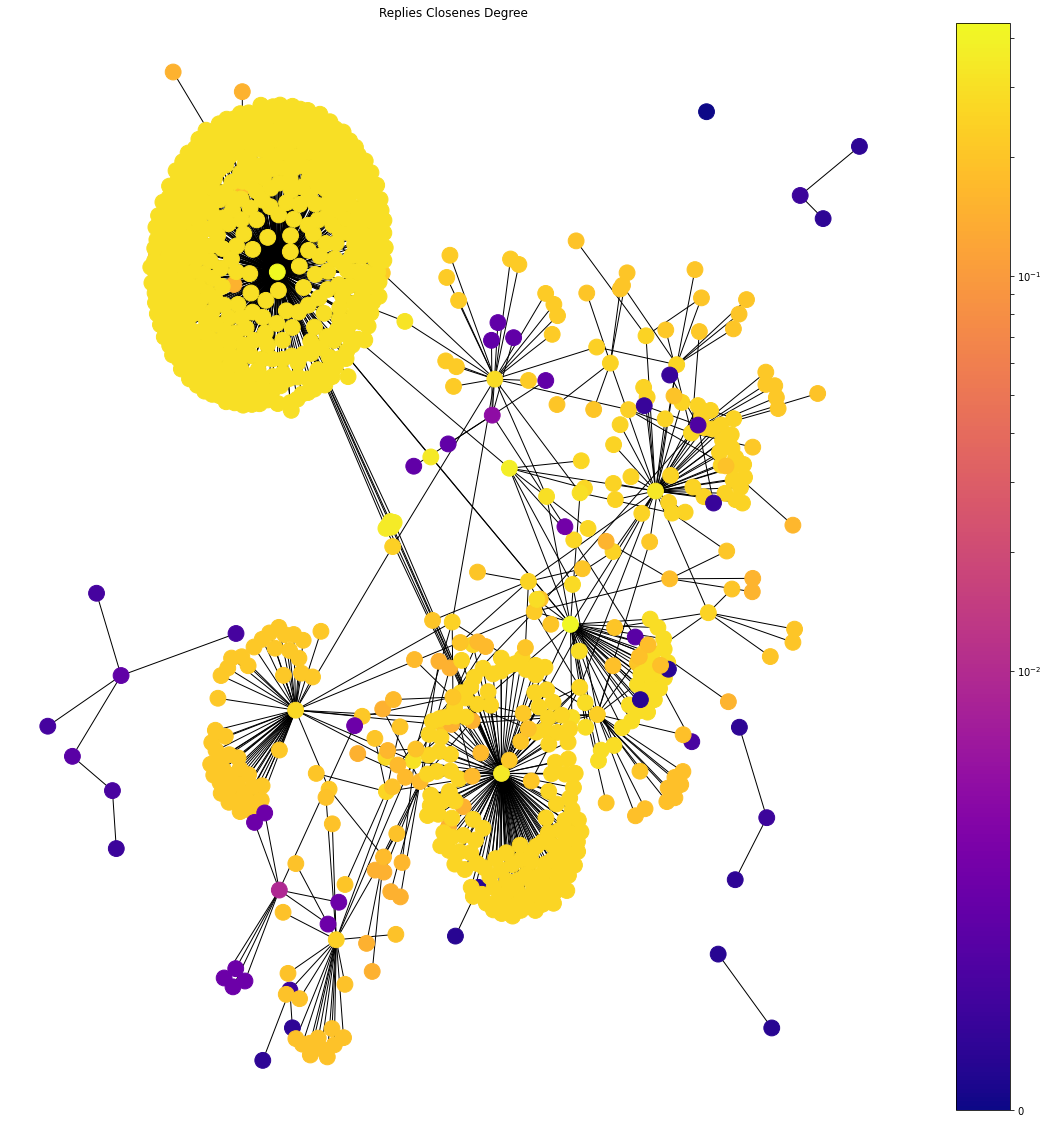

In [87]:
draw(G, nx.spring_layout(G, k=0.05, iterations=20), nx.closeness_centrality(G), 'Replies Closenes Degree', './infojakarta/replies.png')

In [88]:
df_after = pd.read_json('./infojakarta/after_replies.json')
after_scrap = pd.read_json('./infojakarta/after_user_scrap.json')

after = pd.concat([df_after, after_scrap])
after = after.drop_duplicates(subset='link')
after

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1384215782289141767,1384215782289141760,106038219,infojakarta,@InfoJakarta,Gratis vaksin non lansia ...? Kan memang vaks...,3,5,2,[],[],https://twitter.com/infojakarta/status/1384215...,False,https://twitter.com/dinkesJKT/status/138209661...,,,,[],"[@infojakarta, @dinkesJKT, Apr 14, @eckaNh57]"
1,1376929493814677504,1376929493814677504,106038219,infojakarta,@InfoJakarta,"Kurang lebihnya. Sembilan orang ditest, satu ...",3,0,1,[],[],https://twitter.com/infojakarta/status/1376929...,False,https://twitter.com/DKIJakarta/status/13768936...,,,,[],"[@infojakarta, @DKIJakarta, Mar 30, @melwth_, ..."
2,1376883129890205696,1376883129890205696,106038219,infojakarta,@InfoJakarta,Kapan kira-kira kamu dapat vaksin?,33,1,13,[],[],https://twitter.com/infojakarta/status/1376883...,False,,,,,[],"[@infojakarta, @fyrdausy, @RemajaKolonial, @Li..."
3,1373529155304706054,1373529155304706048,106038219,infojakarta,@InfoJakarta,Kalau tidak salah baca datanya. Kemarin 20 ma...,2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,False,https://twitter.com/DKIJakarta/status/13732387...,,,,[],"[@infojakarta, @DKIJakarta, Mar 20, @chiko_jub..."
4,1372218371442319360,1372218371442319360,106038219,infojakarta,@InfoJakarta,Vaksin lansia di @UnikaAtmaJaya Terbuka untuk...,0,12,13,[],[],https://twitter.com/infojakarta/status/1372218...,False,,,,,[],[@infojakarta]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1370008188884459521,1370008188884459520,515109536,melanieppuchino,si Hanih,Jajan plastik vakum roll yg banyak buat modal ...,0,0,0,[],[],https://twitter.com/melanieppuchino/status/137...,False,,,,,[],[@melanieppuchino]
95,1367500891113275399,1367498300576976896,515109536,melanieppuchino,si Hanih,@tirta_hudhi Mpe skrg tas ART-ku (dy nitip pes...,0,0,0,[],[],https://twitter.com/melanieppuchino/status/136...,False,,,,,"[{'screen_name': 'tirta_hudhi', 'name': 'DOKTE...","[@tirta_hudhi, @siapadahnih, Mar 4, @melaniepp..."
96,1366756465000648713,1366756465000648704,515109536,melanieppuchino,si Hanih,Untung keluarga gw ga termasuk panic buying. T...,0,0,1,[],[],https://twitter.com/melanieppuchino/status/136...,False,https://twitter.com/ANYudhp/status/13667320713...,,,,[],"[@melanieppuchino, @ANYudhp, Mar 2]"
97,1366755661791436803,1366748097250947072,515109536,melanieppuchino,si Hanih,@FirzaHusain Bener bgt mbakkk.. tmn2ku ada yg ...,1,0,3,[],[],https://twitter.com/melanieppuchino/status/136...,False,,,,,"[{'screen_name': 'FirzaHusain', 'name': 'Firza...","[@FirzaHusain, @melanieppuchino]"


In [90]:
for i,row in after.iterrows():
    if len(row['list_replies'])<3:
        after = after.drop(i)
    else:
        continue
        
after

,id,conversation_id,user_id,username,name,tweet,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,list_replies
0,1384215782289141767,1384215782289141760,106038219,infojakarta,@InfoJakarta,Gratis vaksin non lansia ...? Kan memang vaks...,3,5,2,[],[],https://twitter.com/infojakarta/status/1384215...,False,https://twitter.com/dinkesJKT/status/138209661...,,,,[],"[@infojakarta, @dinkesJKT, Apr 14, @eckaNh57]"
3,1373529155304706054,1373529155304706048,106038219,infojakarta,@InfoJakarta,Kalau tidak salah baca datanya. Kemarin 20 ma...,2,4,5,[],[],https://twitter.com/infojakarta/status/1373529...,False,https://twitter.com/DKIJakarta/status/13732387...,,,,[],"[@infojakarta, @DKIJakarta, Mar 20, @chiko_jub..."
13,1367147465674158082,1367147465674158080,106038219,infojakarta,@InfoJakarta,"Here we go again. Covid 19 mutasi B117, UK mu...",5,14,9,[],[],https://twitter.com/infojakarta/status/1367147...,False,https://twitter.com/detikcom/status/1366961653...,,,,[],"[@infojakarta, @detikcom, Mar 3, @gokamesa, @e..."
16,1366583228702728193,1366583228702728192,106038219,infojakarta,@InfoJakarta,Hari ini tepat satu tahun sejak kasus pasien p...,18,48,87,[],[],https://twitter.com/infojakarta/status/1366583...,False,,,,,[],"[@infojakarta, @infojakarta, @infojakarta, @in..."
0,1373946472987717635,1373857822882983936,219186854,glowtweets,Glowzingga,@sicupuh Lah malah melakukan langkah haram dal...,0,0,0,[],[],https://twitter.com/glowtweets/status/13739464...,False,,,,,"[{'screen_name': 'sicupuh', 'name': 'azhar noo...","[@sicupuh, @temponewsroom, Mar 21, @glowtweets]"
3,1379070077010472963,1379062543319097344,1371101501356007424,liafrila,liafrila,"@BTS_twt_KimNJ Just read book,listen music bec...",1,0,1,[],[],https://twitter.com/liafrila/status/1379070077...,False,,,,,[],"[@BTS_twt__RM, @liafrila, @bts_twt_LN, @liafrila]"
13,1376815767627296769,1376815767627296768,1673010960,nofrizalwardoyo,Nofrizal Wardoyo,Hallo @KemenkesRI @DKIJakarta jadwal vaksin in...,2,0,0,[],[],https://twitter.com/nofrizalwardoyo/status/137...,False,,,,,[],"[@nofrizalwardoyo, @DKIJakarta, @Riyan_bray]"
16,1368960718897225730,1368960718897225728,1673010960,nofrizalwardoyo,Nofrizal Wardoyo,"Percuma vaksin banyak, covid udah 1 tahun yang...",0,0,0,[],[],https://twitter.com/nofrizalwardoyo/status/136...,False,https://twitter.com/KemensetnegRI/status/13689...,,,,[],"[@nofrizalwardoyo, @KemensetnegRI, Mar 8]"
26,1367401027251568641,1367398851166965760,74056367,arie_16,.....,@thisfrieska Ortu belum vaksin?,0,0,0,[],[],https://twitter.com/Arie_16/status/13674010272...,False,,,,,"[{'screen_name': 'thisfrieska', 'name': 'Fries...","[@thisfrieska, @thisfrieska, @Arie_16]"
27,1385534566765535232,1385534566765535232,66122991,bilonk,brooke,Rakyat gak boleh mudik tp menerima wna positif...,0,0,0,[],[],https://twitter.com/bilonk/status/138553456676...,False,https://twitter.com/CNNIndonesia/status/138550...,,,,[],"[@bilonk, @CNNIndonesia, Apr 23]"


In [91]:
# before = before.drop(before[before['username']=='kompastv'].sample(n=800).index)
after['username'].value_counts()

melanieppuchino    7
chiko_jubilee      5
remajakolonial     4
infojakarta        4
dinkesjkt          3
nofrizalwardoyo    2
dont_sal           1
kokohbucin         1
arie_16            1
siswandibambang    1
liafrila           1
iamcakekhe         1
herireh            1
glowtweets         1
bilonk             1
Name: username, dtype: int64

In [92]:
H = nx.Graph()
for i,row in after.iterrows():
    for rep in row['list_replies']:
        print(str.lower(row['username']), str.lower(rep[1:]))
        H.add_edge(str.lower(row['username']), str.lower(rep[1:]))

infojakarta infojakarta
infojakarta dinkesjkt
infojakarta pr 14
infojakarta eckanh57
infojakarta infojakarta
infojakarta dkijakarta
infojakarta ar 20
infojakarta chiko_jubilee
infojakarta infojakarta
infojakarta detikcom
infojakarta ar 3
infojakarta gokamesa
infojakarta eckanh57
infojakarta kokohbucin
infojakarta arie_16
infojakarta glowtweets
infojakarta infojakarta
infojakarta infojakarta
infojakarta infojakarta
infojakarta infojakarta
infojakarta infojakarta
infojakarta riesbow
infojakarta bilonk
infojakarta kompascom
infojakarta ar 2
infojakarta masivian
infojakarta fettcinocreamyy
infojakarta zakybe
infojakarta _banyulaut
infojakarta eriesatrya
infojakarta eckanh57
infojakarta bilonk
infojakarta arie_16
infojakarta arie_16
infojakarta donyyhudha
infojakarta sarahjoeri
infojakarta oebunda
infojakarta okkyjoeamstrong
infojakarta graciatbg
glowtweets sicupuh
glowtweets temponewsroom
glowtweets ar 21
glowtweets glowtweets
liafrila bts_twt__rm
liafrila liafrila
liafrila bts_twt_ln
liaf

In [93]:
closenes = nx.closeness_centrality(H)
closenes = dict(sorted((value, key) for (key,value) in closenes.items())) 
closenes

{0.011111111111111112: 'tikaalmira',
 0.014814814814814815: 'sudjiwotedjo',
 0.022222222222222223: 'liafrila',
 0.05294117647058824: 'sugiyantininik',
 0.1: 'remajakolonial',
 0.17344262295081966: 'riyan_bray',
 0.18825622775800713: 'znovietha22',
 0.20424710424710427: 'thisfrieska',
 0.2058365758754864: 'pr 23',
 0.20745098039215687: 'temponewsroom',
 0.2082677165354331: 'ar 30',
 0.21950207468879668: 'pringgaft',
 0.22041666666666668: 'pr 22',
 0.22320675105485233: 'nofrizalwardoyo',
 0.2483568075117371: 'melanieppuchino',
 0.27409326424870467: 'zakybe',
 0.27696335078534035: 'arie_16',
 0.2798941798941799: 'kokohbucin',
 0.28288770053475937: 'glowtweets',
 0.28440860215053765: 'siswandibambang',
 0.28594594594594597: 'detikcom',
 0.3022857142857143: 'dkijakarta',
 0.3057803468208093: 'dinkesjkt',
 0.30755813953488376: 'chiko_jubilee',
 0.31301775147928995: 'kompascom',
 0.4232000000000001: 'infojakarta'}

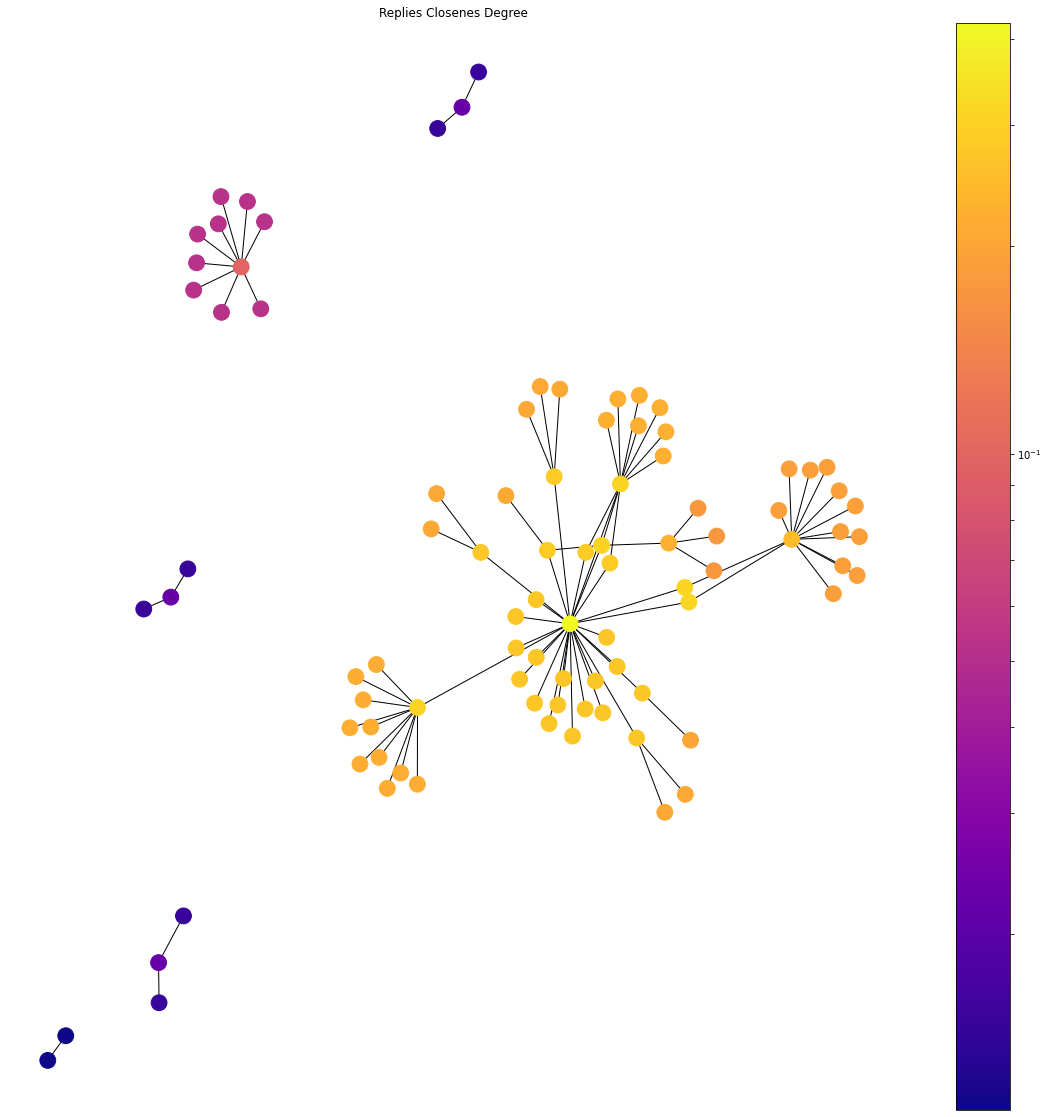

In [96]:
draw(H, nx.spring_layout(H, k=0.05, iterations=20), nx.closeness_centrality(H), 'Replies Closenes Degree', './infojakarta/after_replies.png')